In [1]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [3]:
no_regions = df.shape[0]

for column in df[df.columns[4:]]:
    if (df[column].isin([0]).sum() / no_regions) * 100 > 70:
        df.drop(column,axis=1, inplace=True)
continents = pd.read_csv("continents.csv")
df = pd.merge(right=df, left=continents, right_on='Country/Region', left_on='Country')
dates = df.columns[4:]
countries = df['Country/Region'].unique()
cs = df['Continent'].unique()

In [4]:
def get_cases_for_country(country):
    r =  df.loc[df['Country/Region'] == country].values.tolist()[0]
    return r[4:]

In [5]:
def plot_datewise_for_country(country):
    plt.close()
    plt.tick_params(axis='x', which='major', labelsize=5)
    plt.bar(dates,get_cases_for_country(country))
    plt.xticks(rotation=90)
    plt.savefig(f'charts/{country}.png',dpi=250)

In [6]:
def get_cases_for_date(date):
    r = []
    for c in countries:
        r.append(df.loc[df['Country/Region'] == c][date].sum())
    return r

In [7]:
def plot_countrywise_for_date(date):
    temp = get_cases_for_date(date)
    for i in range(10,len(countries),10):
        plt.clf()
        plt.bar(countries[i-10:i],temp[i-10:i])
        plt.xticks(rotation=90)
        filename  = "date:"+'-'.join(date.split('/'))+"-index:"+str(i)+'.png'
        plt.savefig('charts/'+filename,dpi=250)

In [8]:
def get_cases_for_continent(date):
    r = []
    for c in cs:
        r.append(df.loc[df['Continent'] == c][date].sum())
    return r

In [16]:
def plot_continentwise_for_date(date):
    plt.clf()
    plt.bar(cs,get_cases_for_continent(date))
    plt.xticks(rotation=90)
    filename  = "date:"+'-'.join(date.split('/'))+"continents"+'.png'
    plt.savefig('charts/'+filename,dpi=250)

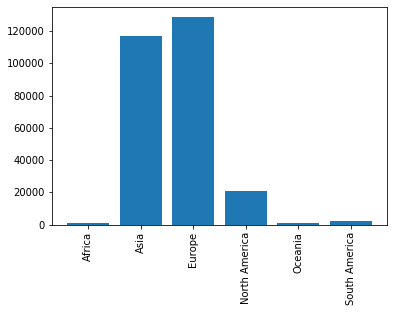

In [18]:
#plot confirmed case on 3-20-20 per continent
plot_continentwise_for_date('3/20/20')

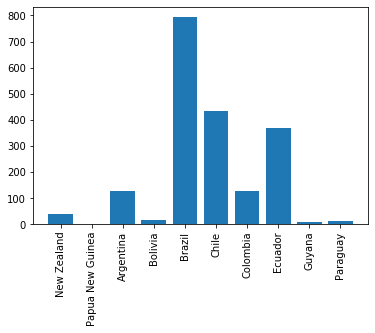

In [21]:
#plot confirmed case on 3-20-20 per country in batches of 10
plot_countrywise_for_date('3/20/20')

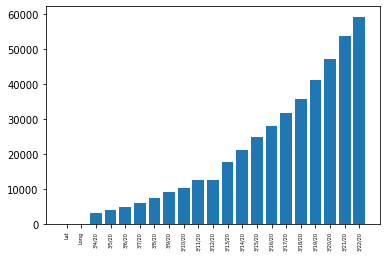

In [22]:
#plot confirmed case in Italy Datewise
plot_datewise_for_country('Italy')